In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder 
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [34]:
df = pd.read_csv('./bankmarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [38]:
df1 = df.drop_duplicates().reset_index(drop=True)
df = df1

In [45]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [46]:
bankcust = df[categorical]
bankcust.head()
bankcust['age'] = df['age']

C:\Users\Dell\AppData\Local\Temp\ipykernel_4628\3498755545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankcust['age'] = df['age']


In [47]:
#converting age to categorical variable 
bankcust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,56
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,57
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,37
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,56


In [48]:
bankcust['age bin'] = pd.cut(bankcust['age'],[0,10,20,30,40,50,60,70,80,90,100], labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
bankcust = bankcust.drop('age', axis = 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4628\3940010026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankcust['age bin'] = pd.cut(bankcust['age'],[0,10,20,30,40,50,60,70,80,90,100], labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])


In [49]:
bankcust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,50-60


In [50]:
bank_cust_copy = bankcust.copy()
encoder = LabelEncoder()
bankcust = bankcust.apply(encoder.fit_transform)
bankcust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age bin
0,3,1,0,0,0,0,1,6,1,1,0,4
1,7,1,3,1,0,0,1,6,1,1,0,4
2,7,1,3,0,2,0,1,6,1,1,0,2
3,0,1,1,0,0,0,1,6,1,1,0,2
4,7,1,3,0,0,2,1,6,1,1,0,4


In [51]:

km = KModes(n_clusters = 2, init='Cao', n_init =1, verbose = 1)
fitClusters = km.fit_predict(bankcust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6349, cost: 196668.0
Run 1, iteration: 2/100, moves: 1786, cost: 196668.0


In [52]:
fitClusters

array([1, 1, 1, ..., 0, 1, 0], dtype=uint16)

In [53]:
clustersDf = pd.DataFrame(km.cluster_centroids_)
clustersDf.columns = bankcust.columns
clustersDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age bin
0,0,1,6,0,2,0,0,6,2,1,0,2
1,1,1,3,0,0,0,1,6,1,1,0,3


In [54]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bankcust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 221534.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6349, cost: 196668.0
Run 1, iteration: 2/100, moves: 1786, cost: 196668.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7102, cost: 192387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6793, cost: 181534.0


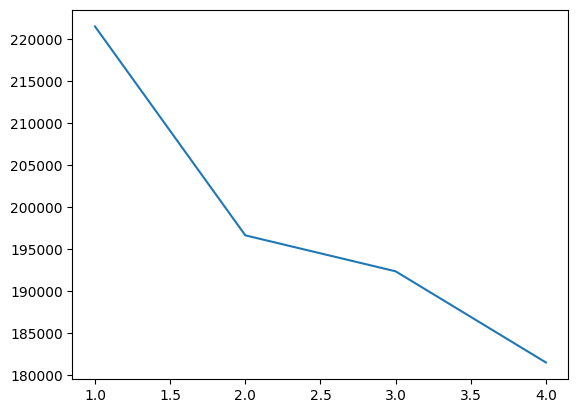

In [55]:
nclusters = range(1,5)
plt.plot(nclusters, cost)

In [56]:
km = KModes(n_clusters = 2, init='Cao', n_init=1)
fitClusters = km.fit_predict(bankcust)

In [58]:
bankcust = bank_cust_copy.reset_index()
clusterDf = pd.DataFrame(fitClusters)
clusterDf.columns = ['Cluster predicted']
df = pd.concat([bankcust, clusterDf], axis = 1).reset_index()
df = df.drop(['index', 'level_0'], axis = 1)

In [59]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age bin,Cluster predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,30-40,1
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,30-40,1
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,50-60,1


In [61]:
cluster_0 = df[df['Cluster predicted'] == 0]
cluster_1 = df[df['Cluster predicted'] == 1]

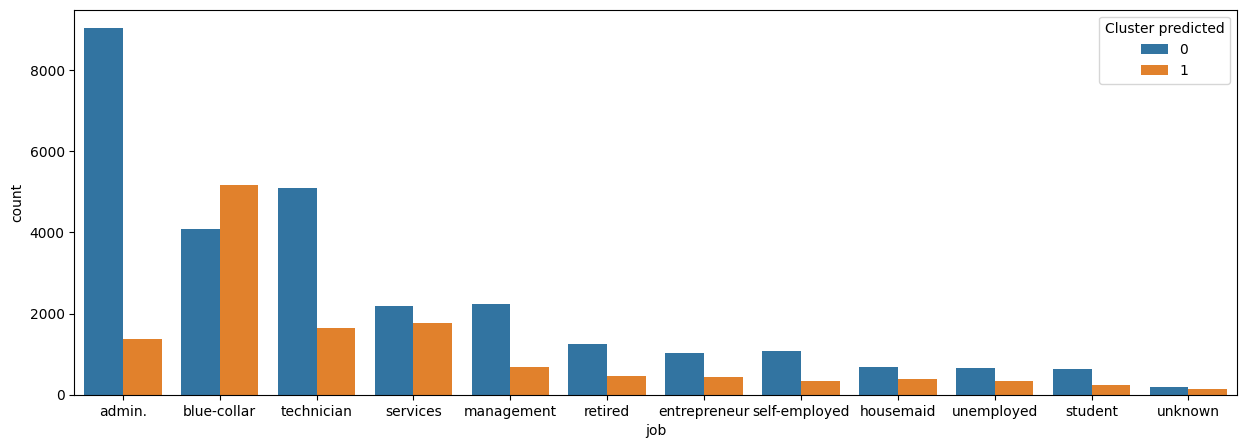

In [66]:
plt.subplots(figsize = (15,5))
sns.countplot(x = df['job'], order = df['job'].value_counts().index, hue = df['Cluster predicted'])
plt.show()

<Axes: xlabel='marital', ylabel='count'>

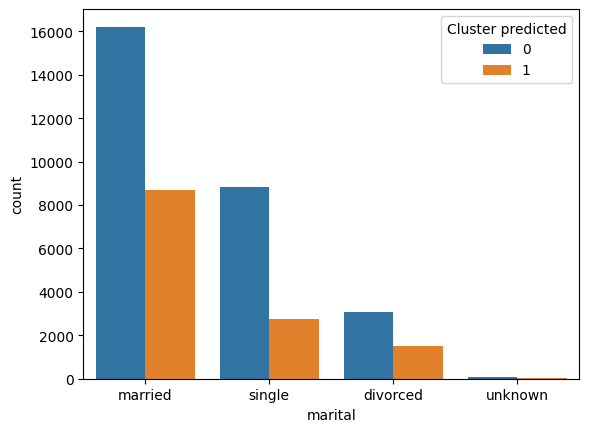

In [67]:
sns.countplot(x = df['marital'], order = df['marital'].value_counts().index, hue = df['Cluster predicted'])

<Axes: xlabel='education', ylabel='count'>

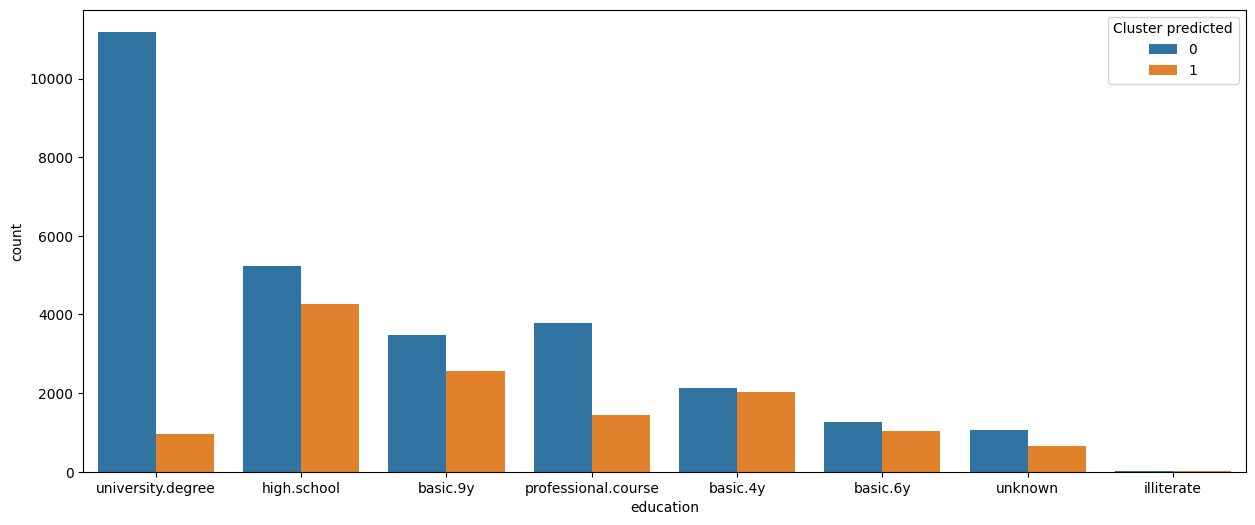

In [70]:
plt.subplots(figsize=(15,6))
sns.countplot(x = df['education'], order = df['education'].value_counts().index, hue = df['Cluster predicted'])